In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
df_ice_cream = pd.read_csv('./data/ice_cream.csv')

In [3]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [4]:
# rename columns to something meaningful
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

# convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

# set date as index
df_ice_cream.set_index('date', inplace=True)

# get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

# show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


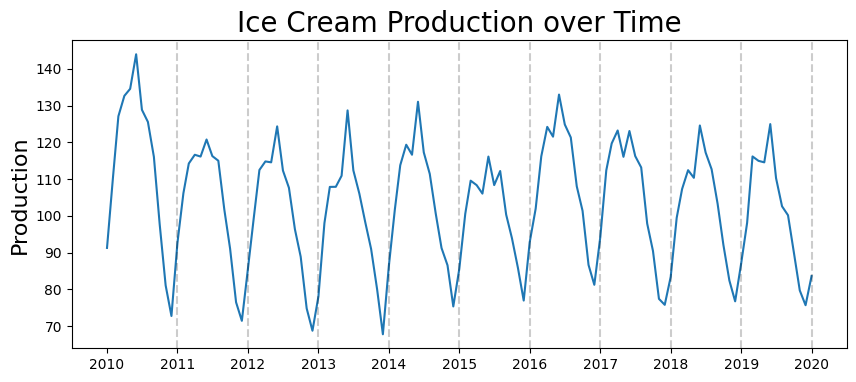

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

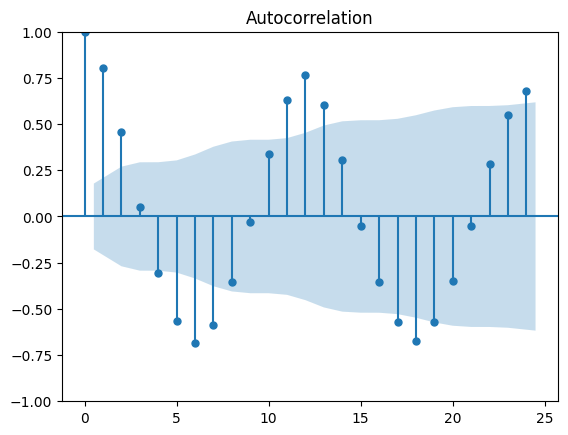

In [9]:
acf_plot = plot_acf(df_ice_cream.production, lags=24)

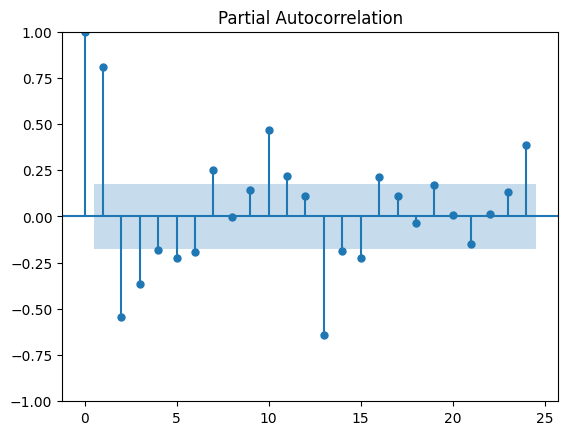

In [10]:
pacf_plot = plot_pacf(df_ice_cream.production, lags=24)

- In ACF plot the most significant spikes are at lag=6 and lag=12. This suggestes seasonality
- In PACF plot the most significant spice is at lag=1, lag=2, and lag=13. This suggestes strong auto correlation
- ACF gives an idea about setting the parameters for MA model
- PACF gives an idea about setting the parameters for AR model